In [12]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(RColorBrewer)
library(cowplot)
library(repr)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
bm <- readRDS("/diskmnt/Projects/SenNet_analysis/Main.analysis/bm/solid/merge/04142023/all_samples/merged_04142023.rds")

In [3]:
colnames(bm[[]])

[1] "orig.ident"        "nCount_RNA"        "nFeature_RNA"     
 [4] "rho"               "percent.mt"        "percent.rb"       
 [7] "doublet_score"     "predicted_doublet" "S.Score"          
[10] "G2M.Score"         "Phase"             "nCount_SCT"       
[13] "nFeature_SCT"      "SCT_snn_res.0.5"   "seurat_clusters"  
[16] "sample_id"         "old.ident"         "CC.Difference"    
[19] "UPN"               "age"               "banking"          
[22] "throughput"        "tissue_processing" "annot"            
[25] "annot_f"

In [17]:
unique(bm[[]]$sample_id)
unique(bm[[]]$tissue_processing)
unique(bm[[]]$annot_f)

[1] "SN004H1-Ma1Fc1Y1N1ZthV1" "SN006H1-Ma1Fc1Y1N1Z1"   
 [3] "SN010H1-Ma1Fc1Y1N1ZthV1" "SN024H1-Ma1Fc1Y1N1Z1"   
 [5] "SN037H1-Ma1A3Y1N1Zt1"    "SN045H1-Ma1A3Y1N1Zt1"   
 [7] "SN050H1-Ma1A3Y1N1ZthV1"  "SN055H1-Ma1A3Y1N1ZthV1" 
 [9] "SN057H1-Ma1A3Y1N1ZthV1"  "SN064H1-Ma1G1Z1"

[1] "OCT_HT"   "OCT_RT"   "FF_RT"    "FF_HT"    "Fresh_RT"

[1] Erythroblast_1 Osteoblast     Myeloid_2      Plasma_Cell    Endothelial_2 
 [6] pDC            MSC_Stem       Neutrophil     Pericyte_2     B             
[11] Endothelial_1  Erythroblast_2 T_NK_2         Myocyte        Fibroblast_2  
[16] Osteoclast     T_NK_1         Erythroblast_3 Myeloid_1      Unknown       
[21] Pericyte_1     Adipocyte      Fibroblast_1   Chondrocyte    Mast_Baso     
[26] Endothelial_3 
26 Levels: Erythroblast_1 Erythroblast_2 Erythroblast_3 ... Unknown

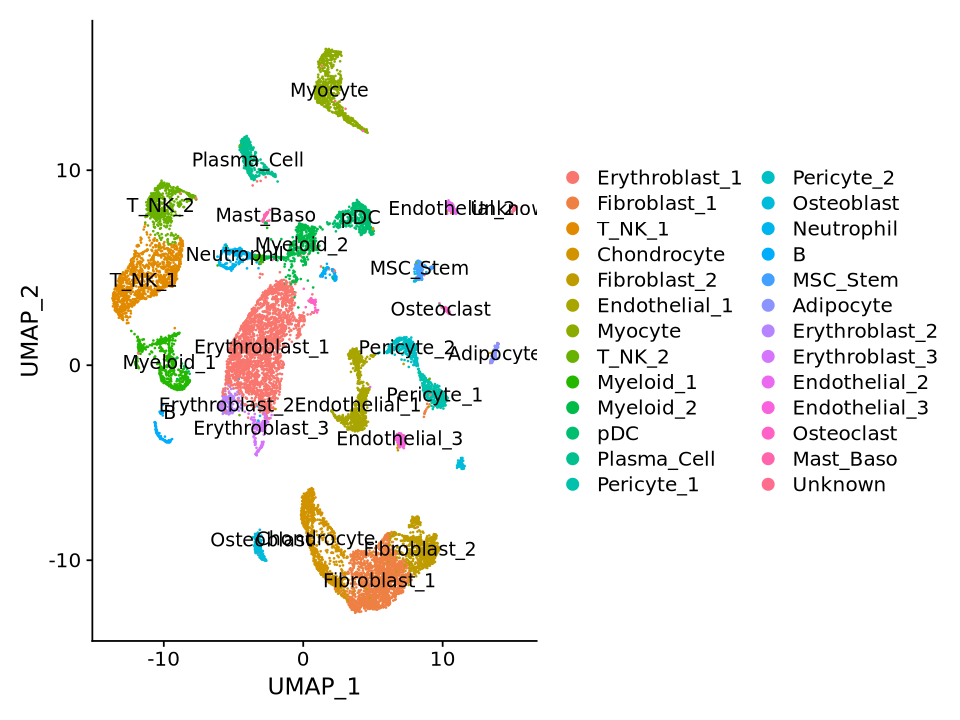

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(bm, label = TRUE)

In [7]:
bm

An object of class Seurat 
64885 features across 14725 samples within 2 assays 
Active assay: SCT (28284 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [3]:
DefaultAssay(bm) <- "RNA"
bm <- DietSeurat(bm, assay = "RNA", layer = "counts")
bm <- SCTransform(bm, assay='RNA', 
                  vars.to.regress = c('percent.mt', 'nFeature_RNA', 'nCount_RNA', "CC.Difference"), 
                  return.only.var.genes = F, conserve.memory=TRUE) %>% RunPCA(npcs = 100)

Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 28284 by 14725

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 161 outliers - those will be ignored in fitting/regularization step


Skip calculation of full residual matrix

Will not return corrected UMI because residual type is not set to 'pearson'

Calculating gene attributes

Wall clock passed: Time difference of 25.44494 secs

Setting min_variance based on median UMI:  0.04

Calculating variance for residuals of type pearson for 28284 genes

Determine variable features

Setting min_variance based on median UMI:  0.16

Calculating residuals of type pearson for 3000 genes



  |======================================================================| 100%


Computing corrected UMI count matrix

Regressing out percent.mt, nFeature_RNA, nCount_RNA, CC.Difference

Centering data matrix

Place corrected count matrix in counts slot

Set default assay to SCT

PC_ 1 
Positive:  LAMA2, MIR99AHG, DMD, TTN, SOX5, NEB, AL110292.1, RBMS3, PRKG1, EBF1 
	   MYBPC1, TRDN, DCLK1, NEAT1, ROBO2, DLC1, PTPRG, PLXDC2, NOVA1, DCN 
	   ABI3BP, CMYA5, NOX4, KCNMA1, NEGR1, RORA, CTNNA3, PDZRN4, FN1, TNNT1 
Negative:  RPS12, RPS27, B2M, RPL39, RPLP1, RPL41, RPL13, RPL10, RPL30, EEF1A1 
	   RPS18, RPL32, TPT1, RPS15A, RPS27A, RPL34, RPS23, RPS3A, RPS28, RPS29 
	   TMSB4X, RPS8, RPS13, RPL28, RPS14, RPL26, RPL11, RPL37, RPL12, RPL19 
PC_ 2 
Positive:  AL110292.1, SOX5, EBF1, MIR99AHG, DCLK1, DCN, PLXDC2, ROBO2, NOX4, NOVA1 
	   DLC1, LAMA2, FN1, NEGR1, PDZRN4, ABI3BP, COL6A3, PTPRG, TSHZ2, GPC6 
	   COMP, FBLN1, COL12A1, PID1, COL11A1, LHFPL6, HBB, GALNT13, COL3A1, ACAN 
Negative:  NEB, TTN, MYBPC1, TRDN, DMD, TNNT1, CMYA5, MYH7, MLIP, OBSCN 
	   RYR1, EMC10, CTNNA

In [21]:
pdf("bm_julia_PCs.pdf", width = 20, height = 8)
for(nd in c(10, 20, 30, 40, 50)){
    bm <- RunUMAP(bm, dims = 1:nd, seed.use = 42) %>% FindNeighbors(dims = 1:nd) %>% FindClusters()
    print(DimPlot(bm, group.by = c("sample_id", "seurat_clusters"), label = TRUE) + ggtitle(nd))
    print(DimPlot(bm, group.by = c("tissue_processing", "seurat_clusters"), label = TRUE) + ggtitle(nd))
    }
dev.off()

11:41:39 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:41:39 Read 14725 rows and found 10 numeric columns

11:41:39 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:41:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:41:41 Writing NN index file to temp file /diskmnt/Projects/Users/chouw/RtmpeJKZnq/file386e95de486e3

11:41:41 Searching Annoy index using 1 thread, search_k = 3000

11:41:46 Annoy recall = 100%

11:41:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:41:49 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 450553

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 23
Elapsed time: 1 seconds


11:42:18 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:42:18 Read 14725 rows and found 20 numeric columns

11:42:18 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:42:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:42:20 Writing NN index file to temp file /diskmnt/Projects/Users/chouw/RtmpeJKZnq/file386e92781ca8e

11:42:20 Searching Annoy index using 1 thread, search_k = 3000

11:42:24 Annoy recall = 100%

11:42:25 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:42:27 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 461725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9250
Number of communities: 26
Elapsed time: 1 seconds


11:42:56 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:42:56 Read 14725 rows and found 30 numeric columns

11:42:56 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:42:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:42:58 Writing NN index file to temp file /diskmnt/Projects/Users/chouw/RtmpeJKZnq/file386e95f47626f

11:42:58 Searching Annoy index using 1 thread, search_k = 3000

11:43:02 Annoy recall = 100%

11:43:04 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:43:05 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 465047

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9300
Number of communities: 29
Elapsed time: 1 seconds


11:43:36 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:43:36 Read 14725 rows and found 40 numeric columns

11:43:36 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:43:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:43:38 Writing NN index file to temp file /diskmnt/Projects/Users/chouw/RtmpeJKZnq/file386e9579b1b1f

11:43:38 Searching Annoy index using 1 thread, search_k = 3000

11:43:42 Annoy recall = 100%

11:43:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:43:47 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 472927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9312
Number of communities: 33
Elapsed time: 1 seconds


11:44:18 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:44:18 Read 14725 rows and found 50 numeric columns

11:44:18 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:44:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:44:20 Writing NN index file to temp file /diskmnt/Projects/Users/chouw/RtmpeJKZnq/file386e96caf62b

11:44:20 Searching Annoy index using 1 thread, search_k = 3000

11:44:24 Annoy recall = 100%

11:44:26 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:44:28 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 483214

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9301
Number of communities: 32
Elapsed time: 1 seconds


png 
  2

In [13]:
pdac_caf_marker <- read.delim("/diskmnt/Projects/Users/austins2/tools/markers/Cell_state_markers_PDAC_caf_v20230508.txt", sep = "\t")
pdac_celltype_marker <- read.delim("/diskmnt/Projects/Users/austins2/tools/markers/Cell_state_markers_PDAC_v20220401.txt", sep = "\t")
all_celltype_marker <- read.delim("/diskmnt/Projects/Users/chouw/pancan_CAF/Cell_state_markers_v10172022.txt", sep = "\t")
caf_list <- read.csv("/diskmnt/Projects/Users/chouw/pancan_CAF/CAF marker.csv")
pancan_list <- read.csv("/diskmnt/Projects/Users/chouw/pancan_CAF/Terekhanova_cell_type_markers_S1e.csv")

In [5]:
head(all_celltype_marker)

,Gene_set_group,Gene_set,Gene,Expression_direction,Common_name
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Immune,TAMs,PIK3CG,,
2,Immune,TAMs,ARG1,,
3,Immune,TAMs,IL6,,
4,Immune,TAMs,IL10,,
5,Immune,TAMs,PDGFB,,
6,Immune,TAMs,TGFB1,,


In [6]:
unique(all_celltype_marker$Gene_set)

[1] "TAMs"                                  
  [2] "Pan-Immune"                            
  [3] "Granulocyte"                           
  [4] "Mast"                                  
  [5] "Basophils"                             
  [6] "B-cells"                               
  [7] "Pre B-cells"                           
  [8] "Plasma cells"                          
  [9] "PMN-MDSC"                              
 [10] "M-MDSC"                                
 [11] "Lin"                                   
 [12] "Macrophages"                           
 [13] "Macrophages M1"                        
 [14] "Macrophages M2"                        
 [15] "M2a"                                   
 [16] "M2b"                                   
 [17] "M2c"                                   
 [18] "M2d"                                   
 [19] "Coinhibitory L"                        
 [20] "Costimulatory L"                       
 [21] "Costimulatory R"                       
 [22] "Chemokine receptors"                   
 [23] "AGP"                                   
 [24] "Scavenger receptors"                   
 [25] "Complement R"                          
 [26] "Fc R"                                  
 [27] "Cytokine R"                            
 [28] "Interferon R"                          
 [29] "Ectoenzymes"                           
 [30] "Activated T cells"                     
 [31] "Proliferating cells"                   
 [32] "naive T cells"                         
 [33] "Exhausted T cells"                     
 [34] "Preexhausted T cells"                  
 [35] "Tregs"                                 
 [36] "CD8+ cytotoxic T cells"                
 [37] "Effector T-cells"                      
 [38] "Memory T-cells"                        
 [39] "Effector memory"                       
 [40] "Central memory"                        
 [41] "1_Terminal effector-like T-cells"      
 [42] "2_Progenitor exhausted T-cells"        
 [43] "3_Intermediate exhausted T-cells"      
 [44] "4_Terminally exhausted T-cells"        
 [45] "Tissue residence"                      
 [46] "CD8 T-cells aged"                      
 [47] "Tfh"                                   
 [48] "CD4 cells"                             
 [49] "Th1"                                   
 [50] "Th2"                                   
 [51] "Th17"                                  
 [52] "tumor-resident CD8 T cells"            
 [53] "NKT cells"                             
 [54] "NK cells"                              
 [55] "NK: CMV adaptive"                      
 [56] "NK: BM resident"                       
 [57] "NK CD56dim"                            
 [58] "NK CD56bright"                         
 [59] "ILC3"                                  
 [60] "ILC2"                                  
 [61] "ILC1"                                  
 [62] "MAIT cells"                            
 [63] "Interferon response"                   
 [64] "Erythrocytes"                          
 [65] "Neutrophils"                           
 [66] "DCs: cDC1"                             
 [67] "DCs: cDC2"                             
 [68] "DCs: cDC2 A"                           
 [69] "DCs: cDC2 B"                           
 [70] "DCs: mo-DC"                            
 [71] "DCs: iDCs"                             
 [72] "Langerhans cells (squamous epith)"     
 [73] "DCs: AS-DC (pre-DC)"                   
 [74] "DCs: pDC"                              
 [75] "DCs: mregDC"                           
 [76] "Monocytes"                             
 [77] "Non-classical monocytes"               
 [78] "Endothelial"                           
 [79] "Myofibroblasts"                        
 [80] "Fibroblasts"                           
 [81] "Pericytes"                             
 [82] "Mural cells"                           
 [83] "vSMCs"                                 
 [84] "Oligodendrocytes"                      
 [85] "Microglia"                             
 [86] "

In [15]:
### Cell type markers
geneSetDotplot <- function(obj, geneList, cellType){ 
    ### Input: 
    # obj: Seurat object
    # geneList: dataframe with marker genes
    # Features: list of features in gene
    for (MarkerType in cellType){
        plt <- DotPlot(obj, assay="SCT", features = unique(dplyr::filter(geneList, Gene_set==MarkerType)$Gene)) + RotatedAxis() + ggtitle(paste0(MarkerType))
        print(plt)
    }
} 

cellTypes <- c("Pan-Immune", "Granulocyte", "Mast", "Basophils", "B-cells", "Pre B-cells", "Plasma cells", 
               "Lin", "Macrophages", "Activated T cells", "naive T cells", "Tregs", "NKT cells", "NK cells", 
               "Erythrocytes", "Neutrophils", "Monocytes", "Endothelial", "Lymphatic endothelial cells", 
               "Pericytes", "Mural cells", "vSMCs", "Fibroblasts", "Myofibroblasts",
               "Adipocyte", "Osteoblasts mature", "Osteoblasts osteogenic differentiation", "Osteoblasts", 
              "Osteo-progenitor", "Osteoblasts early", "Osteocyte", "Chondrocyte")

for (nd in c(10, 20, 30, 40, 50)){
    bm <- RunUMAP(bm, reduction = "pca", dims=1:nd, seed.use = 42) %>% 
        FindNeighbors(reduction = "pca", dims=1:nd) %>% FindClusters()

    pdf(paste("bm_julia_noIntegration_PC", nd, "_markers.pdf", sep=''), width = 6, height = 8)
    geneSetDotplot(bm, all_celltype_marker, cellTypes)
    dev.off()
    }

13:25:04 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:25:04 Read 14725 rows and found 10 numeric columns

13:25:04 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:25:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:25:06 Writing NN index file to temp file /diskmnt/Projects/Users/chouw/Rtmpuv9xVy/file3a6fa9eb3196

13:25:06 Searching Annoy index using 1 thread, search_k = 3000

13:25:11 Annoy recall = 100%

13:25:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:25:14 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 450553

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 23
Elapsed time: 1 seconds


Warning message:
“Could not find PI3 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find MRGPRX2 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: IGHD ”
Warning message:
“The following requested variables were not found: TNFRSF9 ”
Warning message:
“The following requested variables were not found: TRB”
Warning message:
“Could not find HBE1 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6D in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6F in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: GPX1, RP11-1143G9.4”
Warning message:
“Could not find LHX8 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find CITED1 in the default search locations, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 461725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9250
Number of communities: 26
Elapsed time: 1 seconds


Warning message:
“Could not find PI3 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find MRGPRX2 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: IGHD ”
Warning message:
“The following requested variables were not found: TNFRSF9 ”
Warning message:
“The following requested variables were not found: TRB”
Warning message:
“Could not find HBE1 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6D in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6F in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: GPX1, RP11-1143G9.4”
Warning message:
“Could not find LHX8 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find CITED1 in the default search locations, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 465047

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9300
Number of communities: 29
Elapsed time: 1 seconds


Warning message:
“Could not find PI3 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find MRGPRX2 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: IGHD ”
Warning message:
“The following requested variables were not found: TNFRSF9 ”
Warning message:
“The following requested variables were not found: TRB”
Warning message:
“Could not find HBE1 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6D in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6F in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: GPX1, RP11-1143G9.4”
Warning message:
“Could not find LHX8 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find CITED1 in the default search locations, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 472927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9312
Number of communities: 33
Elapsed time: 1 seconds


Warning message:
“Could not find PI3 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find MRGPRX2 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: IGHD ”
Warning message:
“The following requested variables were not found: TNFRSF9 ”
Warning message:
“The following requested variables were not found: TRB”
Warning message:
“Could not find HBE1 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6D in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6F in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: GPX1, RP11-1143G9.4”
Warning message:
“Could not find LHX8 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find CITED1 in the default search locations, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 483214

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9301
Number of communities: 32
Elapsed time: 1 seconds


Warning message:
“Could not find PI3 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find MRGPRX2 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: IGHD ”
Warning message:
“The following requested variables were not found: TNFRSF9 ”
Warning message:
“The following requested variables were not found: TRB”
Warning message:
“Could not find HBE1 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6D in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find LY6G6F in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“The following requested variables were not found: GPX1, RP11-1143G9.4”
Warning message:
“Could not find LHX8 in the default search locations, found in ‘RNA’ assay instead”
Warning message:
“Could not find CITED1 in the default search locations, 

In [4]:
bm <- RunUMAP(bm, reduction = "pca", dims=1:30, seed.use = 42) %>% 
        FindNeighbors(reduction = "pca", dims=1:30) %>% FindClusters()

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:52:46 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:52:46 Read 14725 rows and found 30 numeric columns

12:52:46 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:52:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:52:48 Writing NN index file to 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14725
Number of edges: 465047

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9300
Number of communities: 29
Elapsed time: 1 seconds


Warning message:
“The following requested variables were not found: MMRN”


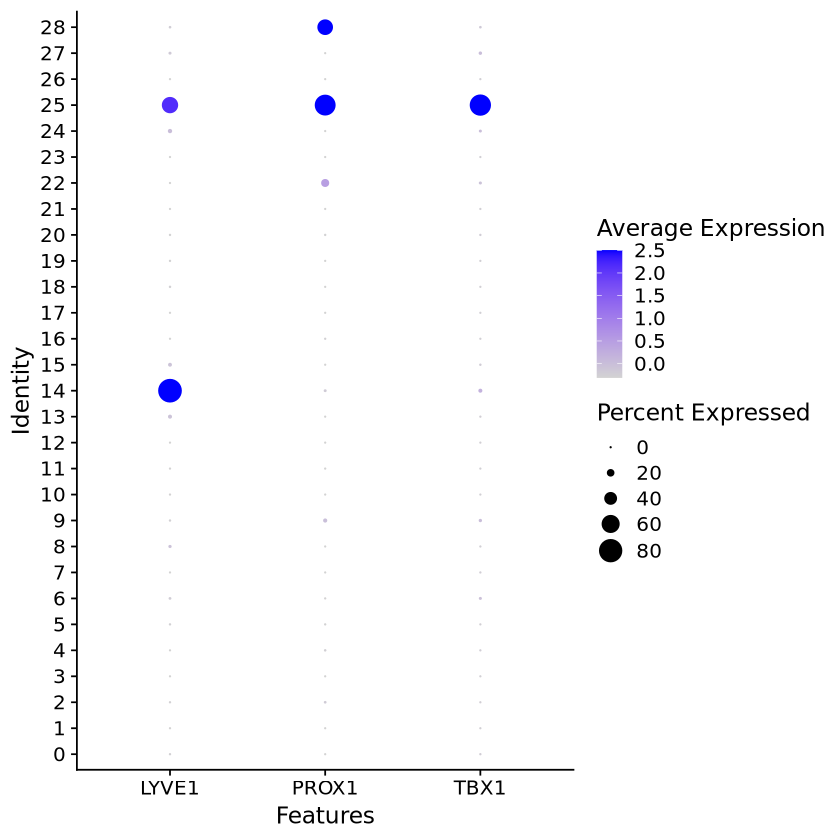

In [22]:
# Lymphatic endo
DotPlot(bm, features = c("LYVE1", "PROX1", "MMRN", "TBX1"))

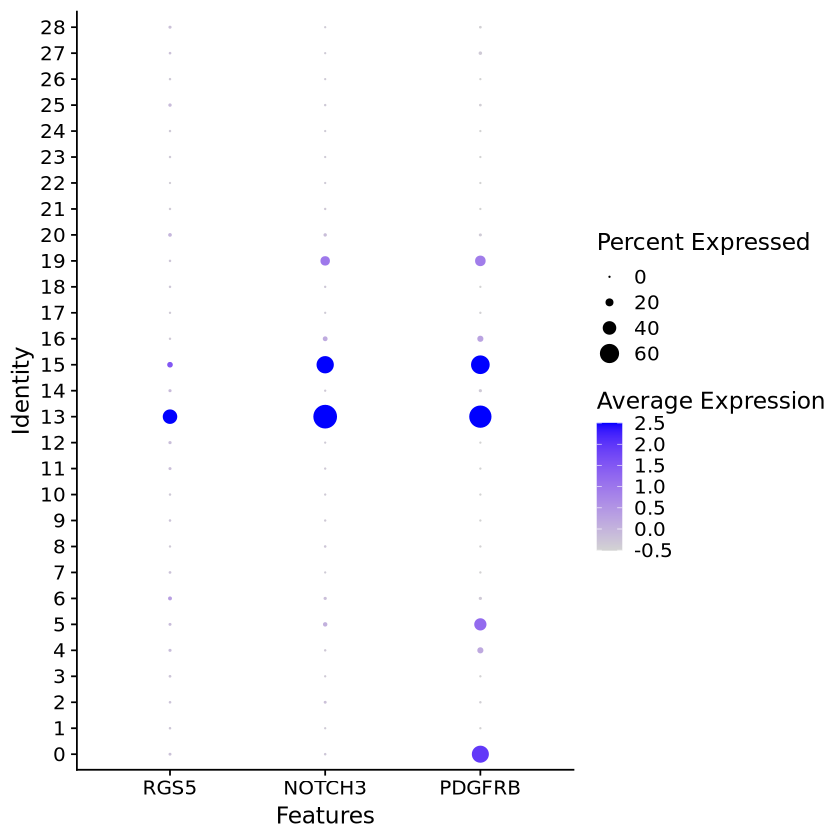

In [23]:
# Pericyte
DotPlot(bm, features = c("RGS5", "NOTCH3", "PDGFRB"))

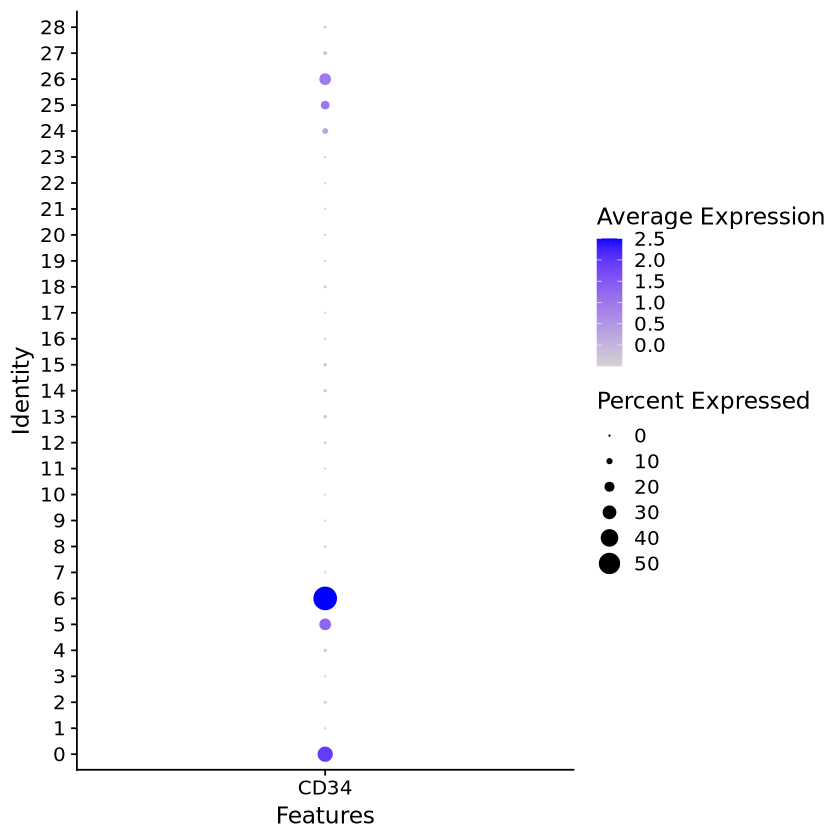

In [24]:
DotPlot(bm, features = c("CD34"))

Warning message:
“The following requested variables were not found: BLBP, Dhh, P75NTR, S100, NCAM”


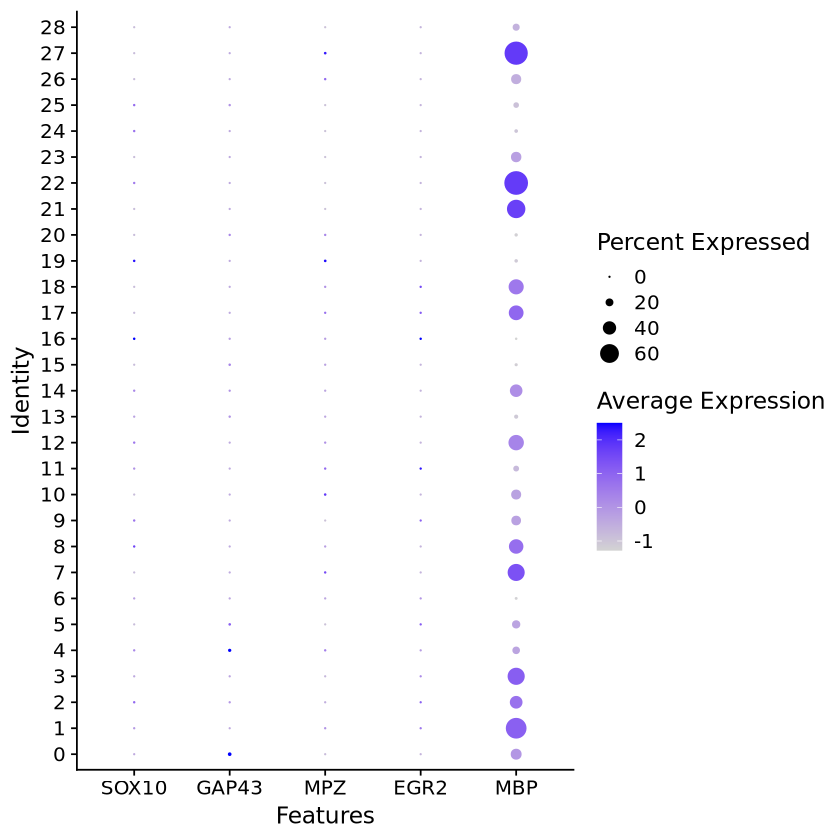

In [25]:
# Schwann cell marker
DotPlot(bm, features = c("SOX10", "GAP43", "BLBP", "MPZ", "Dhh", "P75NTR", "S100", "EGR2", "MBP", "NCAM"))

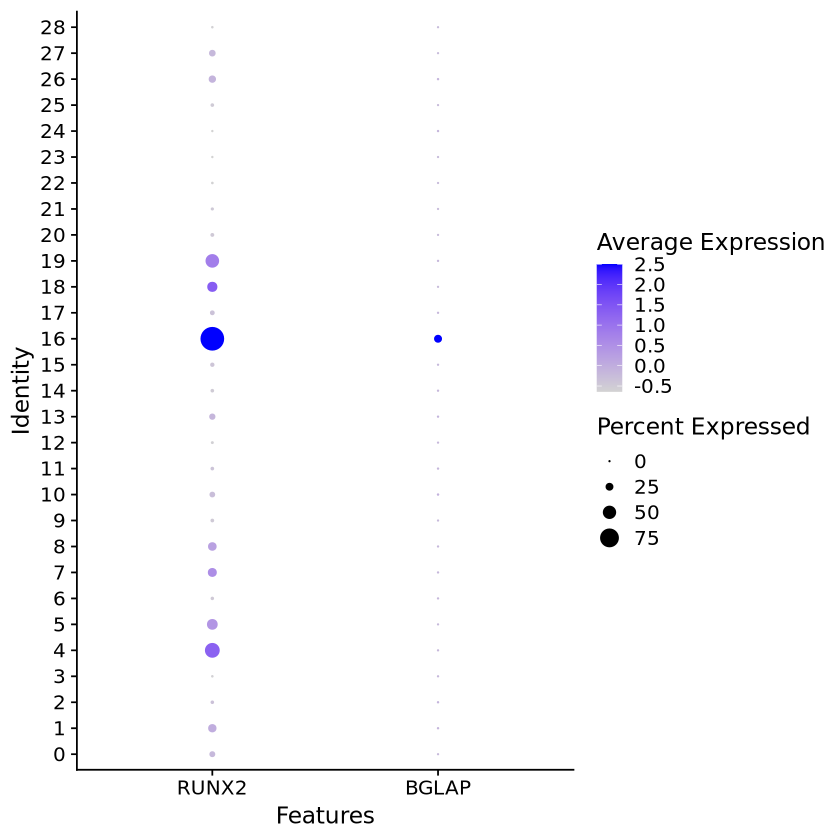

In [26]:
# Osteoblast-specific (RUNX2 is a TF)
DotPlot(bm, features = c("RUNX2", "BGLAP"))

In [28]:
#mes <- c('PDGFRA', 'VIM', 'CXCL12', 'LEPR', 'CEBPA', 'PPARG', 'LPL', 'APOE', 'THY1', 'RUNX2', 'SP7', 
#'IBSP', 'BGLAP', 'COL1A1', 'GSN', 'APOD', 'PDPN', 'HAS1', 'DPT', 'CD164', 'NT5E', 'NGFR', 'MCAM', 'NT5E', 'THY1', 'ENG')

# plot hemoglobin genes 
hemo <- c("HBA1","HBA2","HBB","HBD","HBG1","HBG2","HBM","HBQ1","HBZ")

# immune cell markers
b <- c("CD79A", "CD79B", "CD19", "MS4A1")
t <- c("CD3D", "CD3E", "CD4", "CCR7", "IL7R")
pc <- c("MZB1", "TNFRSF17", "SLAMF7", "SDC1")
nk <- c("GNLY", "GZMK", "FCGR3A")
mye <- c("CD14", "S100A8", "S100A9", "LYZ", "CX3CR1")
pdc <- c("CLEC4C") 
mkc <- c('PPBP','PF4','GNG11','HIST1H2AC','CAVIN2','TAGLN2','PLEK')
imm <- c(b,t,pc,nk,mye,pdc, mkc)

# adipocyte markers
ad <- c('FABP1','FABP2','FABP3','FABP4','FABP5','FABP6','FABP7','UCP1','LEP', 'PLIN1', 'PNPLA2', 'TNFRSF9', 'SLC36A2')
# mesenchymal stromal cells
msc <- c('LEPR', 'ADIPOQ', 'CXCL12', 'KITLG', 'KIT', 'ANGPT1', 'NT5E', 'VCAM1', 'ENG', 'THY1', 'NES', 'CSPG4')
# pericytes
per <- c('NES', 'CSPG4', 'ACTA2', 'MYH11', 'MCAM', 'JAG1', 'IL6')
# chondrocytes
ch <- c('SOX9', 'ACAN', 'COL2A1', 'IHH', 'PTH1R', 'MEF2C', 'RUNX2', 'COL10A1')
# osteoclast and osteoblast markers
oc <- c('CTSK', 'CALCR', 'SIGLEC15', 'ACP5', 'DCSTAMP', 'OCSTAMP', 'TNFRSF11A', 'MMP9')
ob <- c('COL1A1', 'SPARC', 'SP7', 'SPP1', 'BGLAP', 'IBSP', 'ALPL', 'GJA1', 'PTH1R')
# muscle cell markers
mus <- c('DMD', 'MYH1', 'MYH2', 'MYH4', 'MYH7', 'PXN', 'MYL1', 'MYL2', 'MSTN', 'SMTN', 'CNN1', 'CNN2', 'CNN3', 'ACTA2')
# fibroblast markers
fib <- c('COL1A1', 'COL1A2', 'COL4A1', 'COL4A2', 'COL5A1', 'S100A4', 'DCN', 'SEMA3C', 'CXCL12', 'LOXL1', 'LUM', 'FBLN1', 'FBLN2', 'PDGFRA', 'PDGFRB')
# endothelial cells
end <- c('PECAM1', 'CDH5', 'CD34', 'KDR', 'EMCN', 'FLT4')
# erythroblasts
eb <- c('ALAS', 'BIRC3', 'GATA1', 'GDF15', 'KLF1', 'SLC4A1', 'CA3', 'CALB1', 'FKBP1B', 'HIST1H2BD', 'ITLN1', 'PINK1', 'RFXAP', 'SMARCA4', 'TMEM140', 'BRWD3', 'CTSL2', 'DNAJB4', 'GSDMB', 'LIN7B', 'RFFL', 'RRAD', 'ZNF805', 'ATP5L', 'EEF1A1', 'MYL12', 'RPS19', 'SFRS2')
#neutrophils
np <- c('ITGA4', 'ITGAM', 'ITGAX', 'ITGB2', 'SELL', 'MME', 'CXCR4', 'CXCR2', 'CEACAM8', 'CXCR1', 'ELANE')

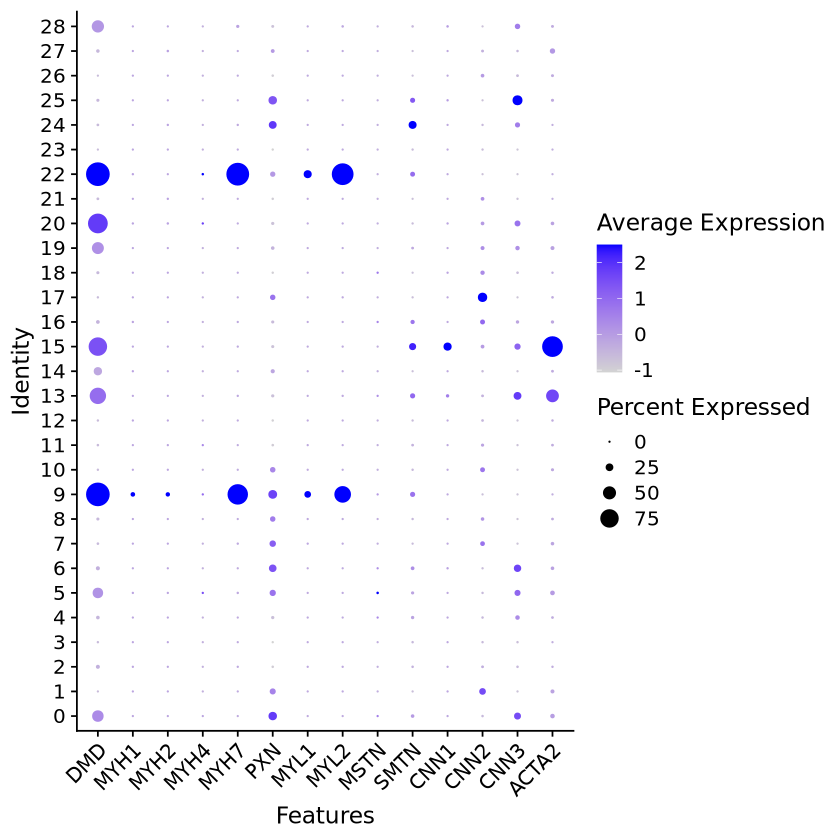

In [31]:
DotPlot(bm, features = mus) + RotatedAxis()

Warning message:
“Could not find OCSTAMP in the default search locations, found in ‘RNA’ assay instead”


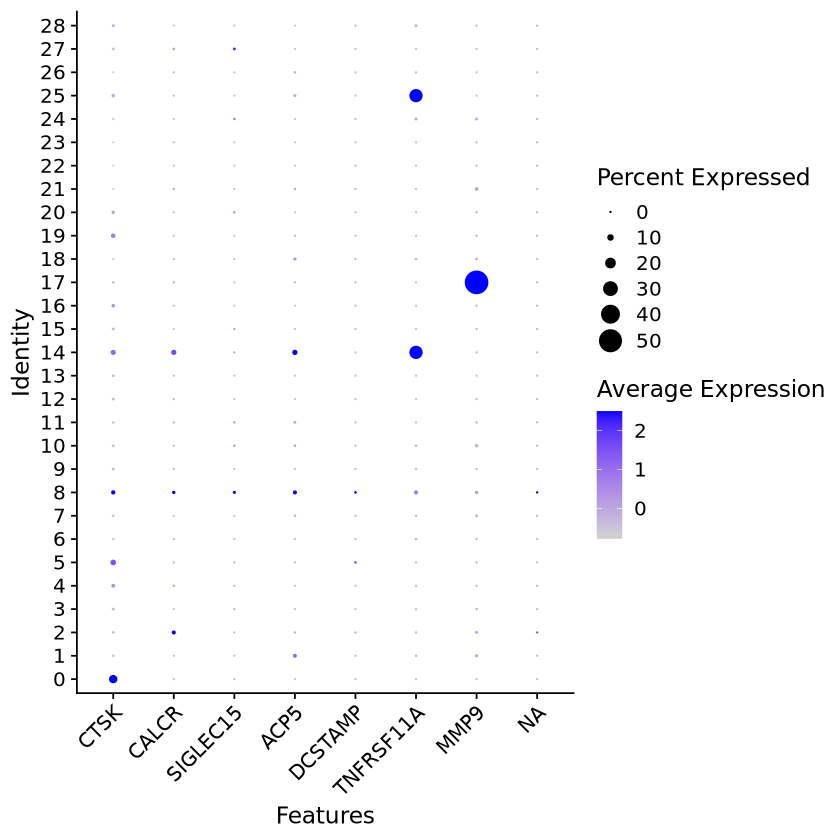

In [39]:
DotPlot(bm, features = oc) + RotatedAxis()

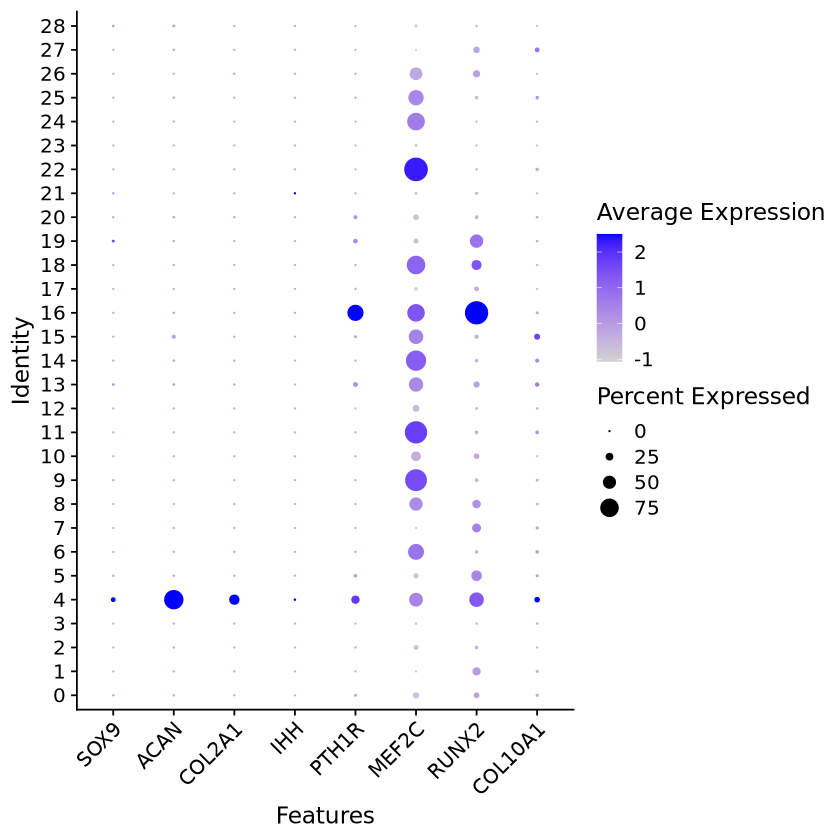

In [42]:
DotPlot(bm, features = ch) + RotatedAxis()

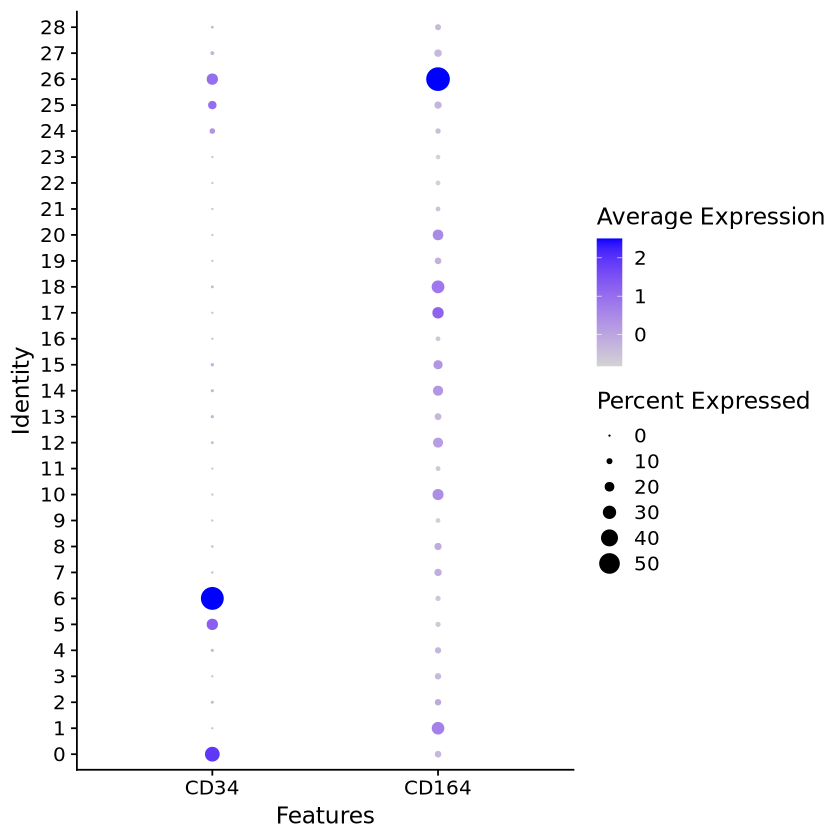

In [41]:
DotPlot(bm, features = c("CD34", "CD164"))

In [5]:
bm[["SCT_clusters"]] <- Idents(bm)
bm <- RenameIdents(bm, '0' = 'Fibroblast/osteoblast_1',
                   '1' = 'T cell',
                   '2' = 'Erythrocyte/erythroblast',
                   '3' = 'Erythrocyte/erythroblast',
                   '4' = 'Chondrocyte?',
                   '5' = 'Fibroblast/osteoblast_2',
                   '6' = 'Endothelial',
                   '7' = 'T/NK cell',
                   '8' = 'Osteoclast?',
                   '9' = 'Myocyte',
                   '10' = 'B/monocyte',
                   '11' = 'Plasma cell',
                   '12' = 'Erythrocyte/erythroblast',
                   '13' = 'Pericyte',
                   '14' = 'Osteoclast?',
                   '15' = 'Vascular smooth muscle',
                   '16' = 'Osteoblast early',
                   '17' = 'Monocyte/Neutrophil?',
                   '18' = 'B cell',
                   '19' = 'Fibroblast/osteoblast_3',
                   '20' = 'Adipocyte',
                   '21' = 'Erythrocyte/erythroblast',
                   '22' = 'myocyte',
                   '23' = 'Erythrocyte/erythroblast',
                   '24' = 'Endothelial',
                   '25' = 'Lymphatic endothelial',
                   '26' = 'HSC/pre B',
                   '27' = 'Granulocyte/mast ce;;')

In [7]:
senmayo <- as.data.frame(read.table('/diskmnt/Projects/SenNet_analysis/Main.analysis/gene_sets/SenMayo_geneset.txt', sep='\t', quote='', comment.char='', header=T))

In [45]:
head(senmayo)

,Gene,Classification,State
,<chr>,<chr>,<chr>
1,ACVR1B,Transmembrane signal receptors,Transmembrane
2,ANG,Miscellaneous,Secreted
3,ANGPT1,Intercellular signal molecule,Secreted
4,ANGPTL4,Intercellular signal molecule,Secreted
5,AREG,Growth factor,Intracellular
6,AXL,Transmembrane signal receptors,Transmembrane


In [8]:
smlist <- list()
smlist[['All SenMayo Genes']] <- senmayo$Gene
for(c in unique(senmayo$Classification)){
smc <- senmayo[which(senmayo$Classification==c),]
smlist[[c]] <- smc$Gene
}

In [9]:
bm <- AddModuleScore(bm, assay='RNA', features = smlist, name="SenMayo")

In [10]:
# SenSig
sensig <- read.csv('/diskmnt/Projects/SenNet_analysis/Papers/SenSig/SkmFibGenes_SenSig_res0.05.ovl_with_cherryetal.csv')
ssg <- sensig$HGNC.symbol
ssg <- ssg[!is.na(ssg)]


sslist <- list()
sslist[['SenSig_genes']] <- ssg
bm <- AddModuleScore(bm, assay='RNA', features=sslist, name='sensig_genes')

Warning message:
“The following features are not present in the object: , C1QTNF3-AMACR, CMKLR2, FHIP1A, CYRIA, ACP3, SPRING1, COMMD3-BMI1, MIDEAS, TAFAZZIN, PEDS1, H3-5, ARHGAP19-SLIT1, QARS1, not searching for symbol synonyms”


In [67]:
# SenNet biomarkers
sennet<- c("ATM","BCL2","CCL2","CCL20","CCL24","CCL3","CCL5","CCL7","CCL8","CDKN1A","CDKN2A",
           "CEBPB","CSF1","CSF2","CSF3","CXCL1","CXCL15","CXCL2","FAS","FGF13","HMGB1","ICAM1",
           "IFNG","IGFBP3","IGFBP4","IGFBP7","IL17A","IL1A","IL1B","IL6","INHBA","IRF1","LMNB1",
           "MKI67","MMP12","MMP13","MMP9","NFKB1","PAPPA","SEMA3F","SERPINB2","SERPINE1",
           "TGFB1","TNF","TP53","VCAM1","VEGFA")
senlist <- list()
senlist[['SenNet_genes']] <- sennet
bm <- AddModuleScore(bm, assay = 'RNA', features = senlist, name = 'SenNet_genes')

Warning message:
“The following features are not present in the object: CXCL15, not searching for symbol synonyms”


In [53]:
colnames(bm[[]])

[1] "orig.ident"        "nCount_RNA"        "nFeature_RNA"     
 [4] "rho"               "percent.mt"        "percent.rb"       
 [7] "doublet_score"     "predicted_doublet" "S.Score"          
[10] "G2M.Score"         "Phase"             "nCount_SCT"       
[13] "nFeature_SCT"      "SCT_snn_res.0.5"   "seurat_clusters"  
[16] "sample_id"         "old.ident"         "CC.Difference"    
[19] "UPN"               "age"               "banking"          
[22] "throughput"        "tissue_processing" "annot"            
[25] "annot_f"           "SCT_snn_res.0.8"   "SenMayo1"         
[28] "SenMayo2"          "SenMayo3"          "SenMayo4"         
[31] "SenMayo5"          "SenMayo6"          "SenMayo7"         
[34] "SenMayo8"          "SenMayo9"          "SenMayo10"

In [13]:
allsmp <- FeaturePlot(bm, features = "SenMayo1", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: All Genes") + coord_fixed(ratio=1)
smp2 <- FeaturePlot(bm, features = "SenMayo2", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Transmembrane Signal Receptor.") + coord_fixed(ratio=1)
smp3 <- FeaturePlot(bm, features = "SenMayo3", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Miscellaneous") + coord_fixed(ratio=1)
smp4 <- FeaturePlot(bm, features = "SenMayo4", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Intercellular Signal Molec. ") + coord_fixed(ratio=1)
smp5 <- FeaturePlot(bm, features = "SenMayo5", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Growth Factors") + coord_fixed(ratio=1)
smp6 <- FeaturePlot(bm, features = "SenMayo6", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Protease Inhibitors") + coord_fixed(ratio=1)
smp7 <- FeaturePlot(bm, features = "SenMayo7", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Cytokine/Chemokine") + coord_fixed(ratio=1)
smp8 <- FeaturePlot(bm, features = "SenMayo8", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: TFs & regulators") + coord_fixed(ratio=1)
smp9 <- FeaturePlot(bm, features = "SenMayo9", label = TRUE, repel = TRUE, raster=T) +
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Metalloproteases") + coord_fixed(ratio=1)
smp10 <- FeaturePlot(bm, features = "SenMayo10", label = TRUE, repel = TRUE, raster=T) + 
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + 
    ggtitle("SenMayo Score: Protein modifying enzymes") + coord_fixed(ratio=1)

pdf("bm_julia_SenMayo_scores_UMAPs.pdf", width=14)
print(plot_grid(allsmp, smp2, ncol=2))
print(plot_grid(smp3, smp4, ncol=2))
print(plot_grid(smp5, smp6, ncol=2))
print(plot_grid(smp7, smp8, ncol=2))
print(plot_grid(smp9, smp10, ncol=2))
dev.off()


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

png 
  2

In [14]:
pdf("bm_julia_SenSig_scores_UMAPs.pdf", width=14)
FeaturePlot(bm, features = "sensig_genes1", label = TRUE, repel = TRUE, raster=T) + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + ggtitle("SenSig Module Score") + coord_fixed(ratio=1)
dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

In [20]:
markers.from.email <- c('GLB1', 'CDKN1A','CDKN2A', 'TP53', 'SERPINE1', 'IL1A', 'IL6', 'CXCL8', 'CCL2', 'MMP1', 'MMP3', 'IGFBP7')
more.markers <- c('CDKN2D', 'CENPB', 'JUN', 'LMNB1',  'TNF', 'TGFB1', 'CXCL1', 'NFKB1', 'RELA', 'HMGB1', 'SERPINB2', 'INHBA', 'GDF15', 'CCL11', 'MIF', 'CXCL2', 'IGFBP3', 'CCL24', 'MMP12', 'CXCL10', 'TP53BP1', 'BCL2')
ma <- c(markers.from.email, more.markers)

p <- DotPlot(bm,  assay='RNA', features=ma, group.by='annot_f') +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

pdf(paste0("bm_julia_manualFromAK_dotplot.pdf"), width=16, height=10)
print(p)
dev.off()

amlist <- list()
amlist[['markers_from_alla']] <- ma
bm <- AddModuleScore(bm, assay='RNA', features=amlist, name='manual_sen_genes')

# plot UMAP colored by score from manually curated sen module
p <- FeaturePlot(bm, features = "manual_sen_genes1", label = TRUE, repel = TRUE, raster=T) + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + ggtitle("Manually Curated Senescence Score") + coord_fixed(ratio=1)

pdf(paste0("markersFromAlla_scores_UMAPs.pdf"), width=10)
print(p)
dev.off()


png 
  2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

In [16]:
sensig$HGNC.symbol

[1] "ALDH1A3"        "PTGS2"          NA               "GFPT2"         
   [5] "ERRFI1"         "CRABP2"         "ABCA6"          "PCOLCE2"       
   [9] "FGF10"          "TEK"            "DPP4"           "FGF2"          
  [13] "SMPD3"          "CA8"            "ACKR3"          "MGP"           
  [17] "ARL4D"          "CARD10"         "ACP5"           "CD55"          
  [21] "TIMP1"          "UGDH"           "DDAH1"          "GPC1"          
  [25] "SDC1"           "FST"            "SERPINE2"       "COL20A1"       
  [29] "FHL2"           "TUBB4A"         "CTSC"           "MYOC"          
  [33] "ANXA8"          NA               "FGL2"           "SEMA3C"        
  [37] "CCN5"           "COL8A2"         "PGR"            "ANXA3"         
  [41] "LVRN"           "SLC7A2"         "ZBTB16"         "EPAS1"         
  [45] "TMEFF2"         "CPZ"            "KRT19"          "CCN4"          
  [49] "GALNT15"        "ARHGAP20"       "CACNA1C"        "EFHD1"         
  [53] "SCARA5"         "COL8A1"         "LIMS2"          "EDNRA"         
  [57] "NPR1"           "DKK3"           "PCSK6"          NA              
  [61] "PPP2R2B"        "FEZ1"           "PLA1A"          "GSN"           
  [65] "MMP13"          "QPCT"           "EFEMP1"         "CPXM1"         
  [69] NA               "SPP1"           "DPEP1"          "CRYAA"         
  [73] "MMP3"           "CREB5"          "ADM"            "PTX3"          
  [77] "ANGPTL7"        ""               "OPCML"          "COL1A1"        
  [81] "MNDA"           "SOCS1"          "TNC"            "PTK7"          
  [85] "SEMA7A"         "THBD"           "NOVA1"          "BGN"           
  [89] "FBLN7"          "SPARC"          "MEGF9"          "ENPEP"         
  [93] "TNFAIP6"        "FBN2"           "ACKR2"          "F2RL1"         
  [97] "COL18A1"        ""               "PDGFRL"         "ENGASE"        
 [101] "PPP1R9A"        "L1CAM"          "CADM3"          "RGS2"          
 [105] "CHPF"           "KCNA1"          "HDAC7"          "CCN2"          
 [109] "AIF1L"          "CD80"           "PTPN5"          "INHBB"         
 [113] "GAN"            "PHLDA3"         "ACKR1"          "ADAMTSL3"      
 [117] "CXCL13"         "CSGALNACT1"     "KRT80"          "ADAM33"        
 [121] "MNDA"           "KIF26B"         "GLIPR1"         "UAP1"          
 [125] "FYN"            "FRMD4B"         "NXN"            "PPL"           
 [129] "MTURN"          NA               "RAMP2"          "COL1A2"        
 [133] "SPON1"          "PDZD2"          "C2orf88"        "CRISPLD1"      
 [137] "LTBP1"          "DDIT4"          "RBPJ"           "ACTN1"         
 [141] "XPNPEP2"        "PDE8A"          "COLGALT2"       "ANGPTL4"       
 [145] "ZNF385A"        "GPR176"         NA               "C5"            
 [149] "F2R"            "CADM1"          "NREP"           NA              
 [153] "DKK2"           "GSTM1"          "DMRT2"          "SH3BGRL3"      
 [157] "NRCAM"          "TM4SF1"         "PLP1"           "STRA6"         
 [161] "CTHRC1"         "MEGF6"          "CLDN1"          "TGM2"          
 [165] "ADAMTS7"        "RNF149"         "TNFRSF10B"      "LHFPL2"        
 [169] "ABCA8"          "IL18"           "TMEM100"        "LOX"           
 [173] "NEURL3"         "RBP1"           "HAS1"           "BRINP3"        
 [177] "PLAU"           "C1QTNF1"        "SEPTIN9"        NA              
 [181] "SCG3"           "C1QTNF3-AMACR"  "MATN2"          "CTSK"          
 [185] "NTRK2"          "AOX1"           "EMILIN1"        "THBS4"         
 [189] NA               "WNT11"          ""               "SERPINB2"      
 [193] "KCNN3"          "TPM2"           "TNN"            "SFRP2"         
 [197] "CDH11"          "GPC3"           "IL17RA"         "JPT1"          
 [201] "ABLIM1"         "SERPINA3"       NA               NA              
 [205] "CEMIP"          "IL1RL2"         "IRGM"           "MMP19"         
 [209] "MICB"           "ERBB3"          "CCL11"          "MYO10"         
 [213] "SERPINA3"       "CES

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


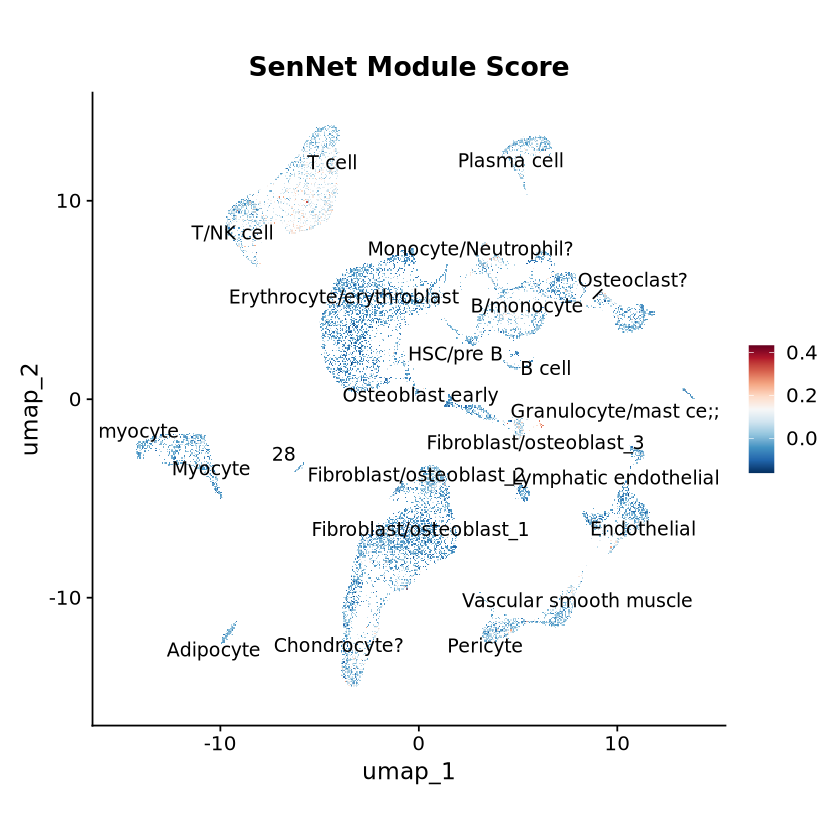

In [69]:
FeaturePlot(bm, features = "SenNet_genes1", label = TRUE, repel = TRUE, raster=T) + scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu"))) + ggtitle("SenNet Module Score") + coord_fixed(ratio=1)

In [6]:
# AUCell from Evan
library(AUCell)
library(ComplexHeatmap)
library(circlize)

senescence_geneset <- readRDS(file = '/diskmnt/Projects/Users/Evan.p/sennet/Senescence_gset.rds')

bm_rna_matrix <- bm[['RNA']]$'counts'

down_geneset <- senescence_geneset[grepl("down|DN", names(senescence_geneset), ignore.case = TRUE)]
up_geneset <- senescence_geneset[!grepl("down|DN", names(senescence_geneset), ignore.case = TRUE)]

calculate_auc_scores <- function(gene_set_name, gene_sets, data_matrix) {
  auc_result <- AUCell_run(data_matrix, gene_sets[[gene_set_name]])
  auc_scores <- auc_result@assays@data$AUC
  auc_vector <- as.vector(auc_scores)
  names(auc_vector) <- colnames(auc_scores)
  return(auc_vector)
}

all_auc_scores <- list() # Initialize an empty list to store AUC scores for each gene set
for(gene_set_name in names(senescence_geneset)) {
  all_auc_scores[[gene_set_name]] <- calculate_auc_scores(gene_set_name, senescence_geneset, bm_rna_matrix)
}

auc_matrix <- do.call(cbind, all_auc_scores)
colnames(auc_matrix) <- names(all_auc_scores)

clusters <- bm$SCT_clusters

auc_df <- as.data.frame(auc_matrix)
auc_df$cluster <- clusters[rownames(auc_df)]

cluster_means <- auc_df %>%
  group_by(cluster) %>%
  summarise(across(everything(), mean, na.rm = TRUE))

cluster_means <- as.data.frame(cluster_means)

scaled_cluster_means <- as.data.frame(scale(cluster_means[-1])) 
rownames(scaled_cluster_means) <- cluster_means$cluster

color_mapping <- colorRamp2(c(-1, 0, 1), c("#0088C0", "#EEEE8C", "#EB304E"))

p <- Heatmap(t(scaled_cluster_means),
             name = "scaled AUC score",
             col = color_mapping,     
             row_title = "Gene Sets",
             column_title = "Clusters",
             cluster_rows = TRUE,
             cluster_columns = TRUE,
             show_column_names = TRUE,
             show_row_names = TRUE, row_names_gp = gpar(fontsize = 6)
            )


pdf('bm_julia_senescence_AUCell_all.pdf', width = 10, height = 8)
draw(p)
dev.off()

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements a

png 
  2

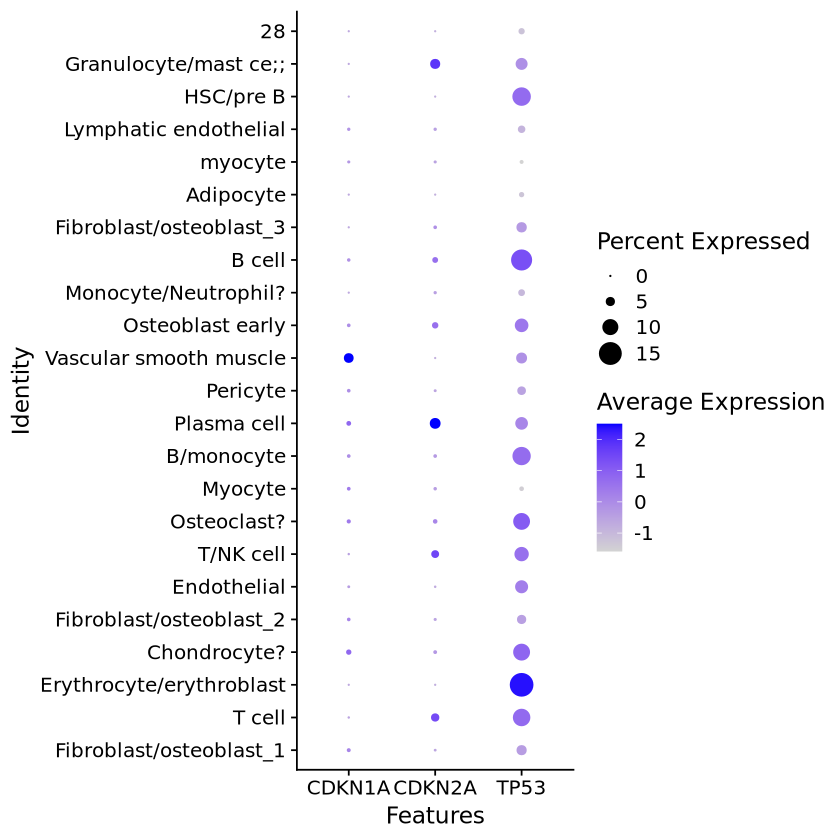

In [17]:
DotPlot(bm, features = c("CDKN1A", "CDKN2A", "TP53"))